## Set-up

In [1]:
# Import libraries
import nasdaqdatalink
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Set-up configuration
nasdaqdatalink.ApiConfig.api_key = "sK9wxGHqNrttL-Suss7i"

## Load data


Let's get some data using the Nasdaq API

https://data.nasdaq.com/data/BOE/XUDLBK67-effective-exchange-rate-index-sterling-jan-2005-100


In [2]:
# Request data
data = nasdaqdatalink.get("BOE/XUDLBK67") #Getting the Effective Exchange Rate Index Data

In [3]:
# Inspect data
data.tail(10)

,Value
Date,
2022-10-28,78.5547
2022-10-31,78.3956
2022-11-01,78.0159
2022-11-02,78.0318
2022-11-03,76.6679
2022-11-04,76.4985
2022-11-07,77.3419
2022-11-08,77.6939
2022-11-09,76.6264


<AxesSubplot: xlabel='Date', ylabel='value'>

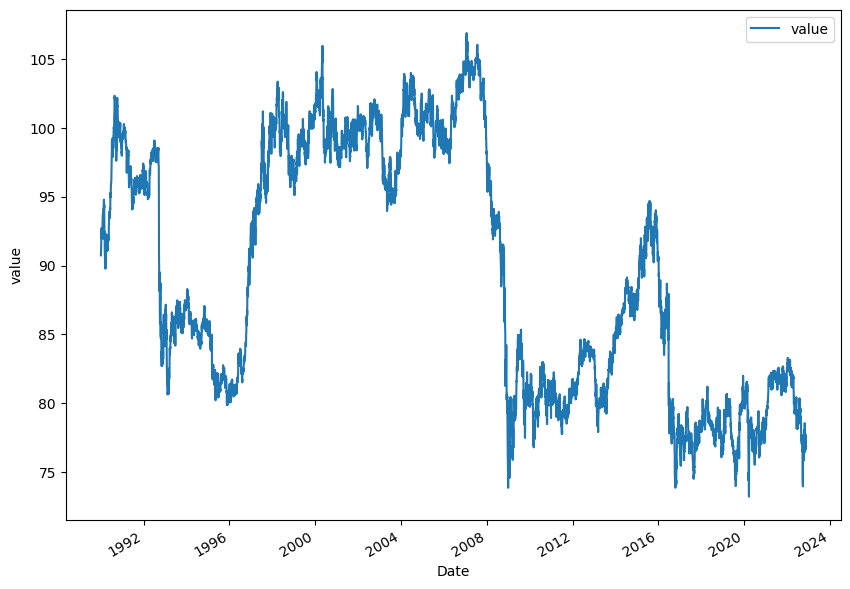

In [4]:
# Rename header
data.columns = ["value"]

# Generate plot of data 
data.plot(figsize=(10,7.5), ylabel = "value")

## Process data

<AxesSubplot: xlabel='Date', ylabel='value'>

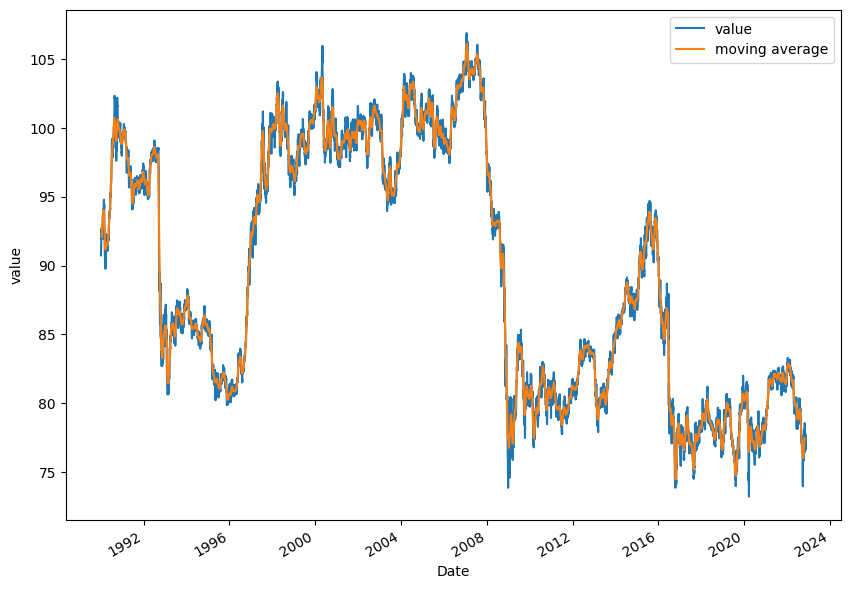

In [5]:
# Overlay rolling average
data["moving average"] = data.rolling(21,center=True).mean()
data.plot(figsize=(10,7.5), ylabel = "value")

## Model data

We'll be using the [Prophet Library](https://facebook.github.io/prophet/) to forecast the next two years the Effective Exchange Rate Index Data

In [6]:
# Import Prophet
from prophet import Prophet

/Users/marisa.mitchell/Desktop/products/quandl-python-demo/myenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
# Create subset of data to use for modeling
data_sub = data["2004-01-01":]
data_sub

,value,moving average
Date,,
2004-01-02,98.4095,99.061014
2004-01-05,98.8622,99.152714
2004-01-06,99.4158,99.258195
2004-01-07,99.6069,99.366138
2004-01-08,99.9256,99.487929
...,...,...
2022-11-04,76.4985,NaN
2022-11-07,77.3419,NaN
2022-11-08,77.6939,NaN


In [8]:
# Get the data in the format that prophet wants it
data_forecast = data_sub.reset_index()
data_forecast = data_forecast[["Date", "value"]].rename(columns={"Date": "ds", "value": "y"})

In [9]:
# Fit Prophet model
m = Prophet()
m.fit(data_forecast)
future = m.make_future_dataframe(periods=730) #predicting 2 years of data
forecast = m.predict(future)

14:57:11 - cmdstanpy - INFO - Chain [1] start processing
14:57:13 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Inspect forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5494,2024-11-05,82.355268,65.265191,97.959821
5495,2024-11-06,82.368970,65.203352,97.946427
5496,2024-11-07,82.388944,65.291349,97.749853
5497,2024-11-08,82.347631,64.708685,98.435630
5498,2024-11-09,79.740673,61.913576,95.321226


- **ds**: the datestamp of the forecasted value
- **yhat**: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
- **yhat_lower**: the lower bound of our forecasts
- **yhat_upper**: the upper bound of our forecasts

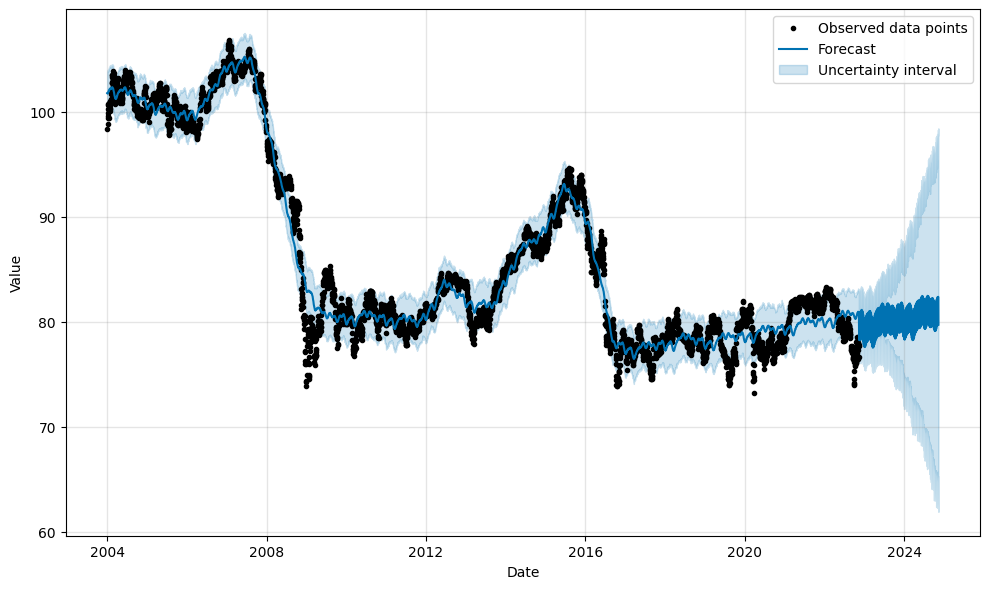

In [11]:
# Plot forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Value', include_legend=True)